# A sort of random walk in a rectangular grid

A random walker moves at discrete time 1, 2, 3, ...in a finite 2D rectangular grid either by one horizontal or a vertical step, or it does not move at all if there are no options available. 

At any discrete time $t$ and at a given point $p_t$ of the grid,  the walker randomly choose the next point $p_{t+1}$ out of a  set $N(p_t)$ . This set is made up of at most 4 points of the grid. The walker has memory, so that it remembers all the points of $N(p_t).$ Those points cannot be consider as possible moves in future time so that for all $s> t$ we have  

$$ N(P_t) \cap  N(P_s)= \emptyset. $$

As time passes by, the walker has less options to chosse the next move. Therefore,  the process must stop. The number of the neccesary steps to stop the process is called *living time*. In case of a $n\times n$ grid,  we normalize the living time as a fraction of $\sqrt{n}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.linalg import svd

In [2]:
# The walker remains inside the grid
cond = lambda x : (x>= 0) and (x<  size) 

We keep the memory  by defining a matriz $M(t)$ of the size of the grid. Initially $M(0)= 0.$ 

In [3]:
def neighboring(entry, mtx):
    """  It defines de neighboring points $N(p_t)$ of an entry $p_t$. 
    The memory matrix mtx must vanishes at any entry corresponding to a 
    neighboring point """

    i, j = entry[0], entry[1]
    pool = [(i-1,j), (i+1, j), (i, j-1), (i, j+1)]
    return [q for  q in pool if cond(q[0]) and cond(q[1]) and mtx[q[0], q[1]]== 0 ]  

At a given time,  $t$ we update the memory matrix so that   entries corresponding to the set   $N(p_t)$ are assigned either the value of $-1$ or 1. The value 1 is assigned to the chossen entry. 

In [61]:
size = 700
def matrixConstructor():
    """ At any step the memory matrix is updated"""
    mtx = np.reshape(np.zeros(size*size), (size,size))
    p = (random.choice(range(size)),  random.choice(range(size)))
    mtx[p] = 1
    counter = 1
    while len(neighboring(p, mtx))>0:
        pool = neighboring(p, mtx)
        for q in pool: mtx[q]= -1
        q = random.choice(pool)
        mtx[q] = 1
        p = q
        counter += 1
    return (mtx, counter/np.sqrt(size))

In [64]:
mtx, steps = matrixConstructor() 
steps

4.535573676110727

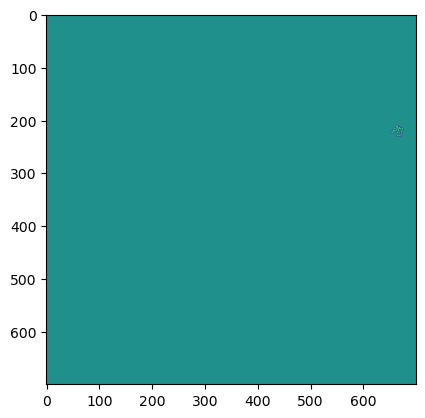

In [65]:
plt.imshow(mtx)

## Walker's expected living time

In [66]:
samplingSize = 25000
lvnT = []
for k in range(samplingSize): lvnT.append(matrixConstructor()[1])

In [67]:
(np.mean(lvnT), np.std(lvnT), np.sqrt(2*np.mean(lvnT)))

(3.997442978019109, 2.766724279267039, 2.8275229364300865)

In [71]:
from scipy.stats import chi2
rv = chi2(4)
x = np.linspace(0, 20, 100)
#ax.plot(xx, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

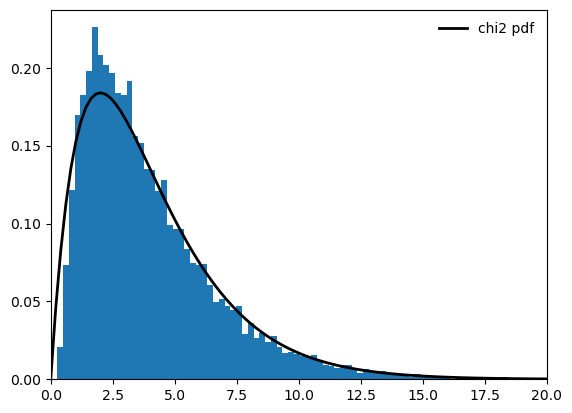

In [75]:
plt.hist(lvnT,bins = 120, density=True)
plt.xlim(0, 20)
plt.plot(x, rv.pdf(x), 'k-', lw=2,  label='chi2 pdf')
#plt.grid(True)
plt.legend(loc='best', frameon=False)
plt.show()

## Expected eigenvalues of the resulting matrix

In [69]:
def samplingEV():
    samplingSize = 10000
    B= matrixConstructor()[0]
    A = np.matmul(B, np.transpose(B))
    U, s, VT = svd(A)
    evs = s
    for k in range(samplingSize-1):
        B= matrixConstructor()[0]
        A = np.matmul(B, np.transpose(B))
        U, s, VT = svd(A)
        evs = np.append(evs, s)
    
    eigenvalues = []
    for j in range(size):
        ev = evs[j: size*samplingSize:size]
        z = np.mean(ev)
        eigenvalues.append(z)
        
    return np.array(eigenvalues)

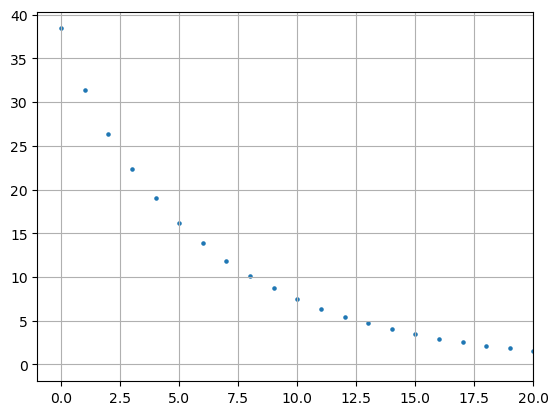

[38.42567631 31.36626052 26.38069697 22.33706683 19.01056414]
2.030997848982575e-15


In [70]:
eigenvalues = samplingEV()

xx = range(len(eigenvalues))
plt.scatter(xx, eigenvalues, s = 5.1)
plt.xlim(-1, 20)
plt.grid(True)
plt.show()

print(eigenvalues[:5])
print(eigenvalues[-1])